In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot
data=pd.read_csv("heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
print(data.info())
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
def __init__(self, X_test, y_test):
        self.X = X_test
        self.y = y_test
def plot_roc_curve(self, model, part='h1', save=False):
        probs = model.predict_proba(self.X)
        preds = probs[:, 1]

        fpr, tpr, threshold = roc_curve(self.y, preds)
        roc_auc = auc(fpr, tpr)

        plt.title('Receiver Operating Characteristic')
        plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0, 1], [0, 1], 'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        
        plt.show()

Accuracy: 0.8552631578947368
[[29  9]
 [ 2 36]]
              precision    recall  f1-score   support

           0       0.94      0.76      0.84        38
           1       0.80      0.95      0.87        38

    accuracy                           0.86        76
   macro avg       0.87      0.86      0.85        76
weighted avg       0.87      0.86      0.85        76



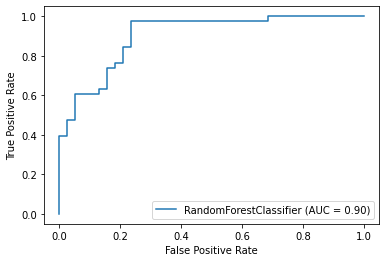

In [15]:
X=data[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]] 
y=data['target'] 
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.25) 
clf=RandomForestClassifier(n_estimators=50,max_leaf_nodes=15,max_depth=19)  
clf.fit(x_train, y_train)  
y_pred=clf.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(clf,x_test, y_test)

Accuracy: 0.6578947368421053
[[20 18]
 [ 8 30]]
              precision    recall  f1-score   support

           0       0.71      0.53      0.61        38
           1       0.62      0.79      0.70        38

    accuracy                           0.66        76
   macro avg       0.67      0.66      0.65        76
weighted avg       0.67      0.66      0.65        76



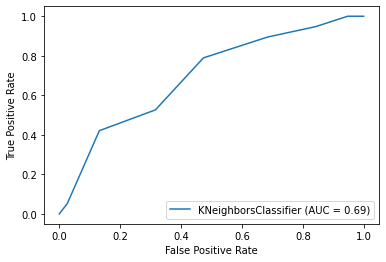

In [16]:
knn = KNeighborsClassifier(n_neighbors=7).fit(x_train, y_train)
y_pred=knn.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(knn,x_test, y_test)

Accuracy: 0.7631578947368421
[[24 14]
 [ 4 34]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.73        38
           1       0.71      0.89      0.79        38

    accuracy                           0.76        76
   macro avg       0.78      0.76      0.76        76
weighted avg       0.78      0.76      0.76        76



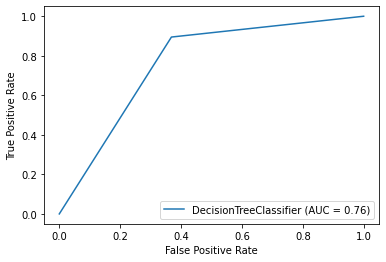

In [17]:
cart = DecisionTreeClassifier(max_depth=15).fit(x_train, y_train)
y_pred=cart.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
metrics.plot_roc_curve(cart,x_test, y_test)